In [1]:
# testing_morningstar_data.py
import os
import morningstar_data as md

os.environ['MD_AUTH_TOKEN']="paste copied token here"

md.direct.get_morningstar_data_sets()

MalformedJWTError: Invalid JWT format. JWT should look like 'header.payload.signature' where header and payload are base64 encoded strings and signature is a hex string.

Choose:
	1. 3 Month
	2. 6 Month
	3. 1 Year
	4. 3 Year
	5. 5 Year
	6. 10 Year

 -->: 5


<Axes: xlabel='date'>

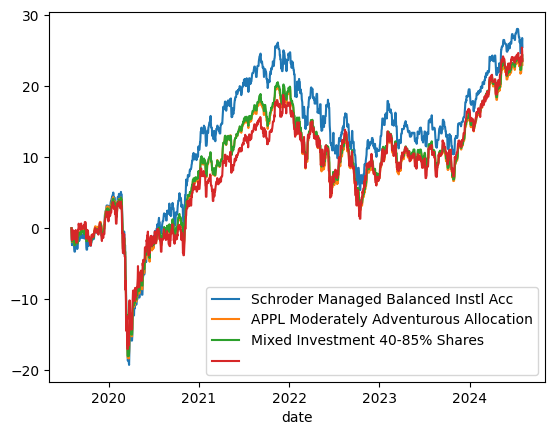

In [3]:
import requests
import pandas as pd
from datetime import datetime
from dateutil import relativedelta

userInput = input('Choose:\n\t1. 3 Month\n\t2. 6 Month\n\t3. 1 Year\n\t4. 3 Year\n\t5. 5 Year\n\t6. 10 Year\n\n -->: ')
userDict = {'1':3,'2':6,'3':12,'4':36,'5':60,'6':120}


n = datetime.now()
n = n - relativedelta.relativedelta(days=1)
n = n - relativedelta.relativedelta(months=userDict[userInput])
dateStr = n.strftime('%Y-%m-%d')


url = 'https://tools.morningstar.co.uk/api/rest.svc/timeseries_cumulativereturn/t92wz0sj7c'

data = []
idDict = {
        'Schroder Managed Balanced Instl Acc':'F0GBR050AQ]2]0]FOGBR$$ALL',
        'APPL Moderately Adventurous Allocation':'EUCA000916]8]0]CAALL$$ALL',
        'Mixed Investment 40-85% Shares':'LC00000012]8]0]CAALL$$ALL',
        '':'F00000ZOR1]7]0]IXALL$$ALL',}


for k, v in idDict.items():
    payload = {
    'encyId': 'APPL',
    'idtype': 'Morningstar',
    'frequency': 'daily',
    'startDate':  dateStr,
    'performanceType': '',
    'outputType': 'COMPACTJSON',
    'id': v,
    'decPlaces': '8',
    'applyTrackRecordExtension': 'false'}
    
    
    temp_data = requests.get(url, params=payload).json()
    df = pd.DataFrame(temp_data)
    df['timestamp'] = pd.to_datetime(df[0], unit='ms')
    df['date'] = df['timestamp'].dt.date 
    df = df[['date',1]]  
    df.columns = ['date', k]
    data.append(df)         

final_df = pd.concat(
    (iDF.set_index('date') for iDF in data),
    axis=1, join='inner'
).reset_index()


final_df.plot(x="date", y=list(idDict.keys()), kind="line")